
# 🌍 Tutorial 01 — Getting Started with Earth Observation (EO) in Python

Welcome! This notebook is the companion to **Tutorial 01**. You'll explore an ERA5 sample file using **xarray** and make your first plot.

> **Prerequisites** (already done in the README):
> - Create and activate a virtual environment with `venv`
> - Install packages: `pip install xarray netCDF4 matplotlib notebook`
> - Ensure the sample file exists at: `data/era5_sample.nc`


## 1. Open the ERA5 dataset

In [3]:

import xarray as xr
import matplotlib.pyplot as plt

DATA_PATH = "../data/era5_sample.nc"  # adjust if needed

ds = xr.open_dataset(DATA_PATH)
ds


<xarray.Dataset> Size: 58MB
Dimensions:     (valid_time: 2, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 16B 2015-09-11T06:00:00 2015-09-1...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 32B ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 8MB ...
    v10         (valid_time, latitude, longitude) float32 8MB ...
    d2m         (valid_time, latitude, longitude) float32 8MB ...
    t2m         (valid_time, latitude, longitude) float32 8MB ...
    msl         (valid_time, latitude, longitude) float32 8MB ...
    sst         (valid_time, latitude, longitude) float32 8MB ...
    sp          (valid_time, latitude, longitude) float32 8MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-15T18:06 GRIB to CDM+CF via cfgrib-0.9.1...

## 2. Explore variables, dimensions, and coordinates

In [4]:

print("\n=== Dataset summary ===")
print(ds)

print("\n=== Data variables ===")
print(ds.data_vars)

print("\n=== Coordinates ===")
print(ds.coords)

print("\n=== Global attributes ===")
print(ds.attrs)



=== Dataset summary ===
<xarray.Dataset> Size: 58MB
Dimensions:     (valid_time: 2, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 16B 2015-09-11T06:00:00 2015-09-1...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 32B ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 8MB ...
    v10         (valid_time, latitude, longitude) float32 8MB ...
    d2m         (valid_time, latitude, longitude) float32 8MB ...
    t2m         (valid_time, latitude, longitude) float32 8MB ...
    msl         (valid_time, latitude, longitude) float32 8MB ...
    sst         (valid_time, latitude, longitude) float32 8MB ...
    sp          (valid_time, latitude, longitude) float32 8MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  Europea

## 3. Inspect the time dimension

In [10]:

times = ds.valid_time.values
print("Number of timesteps:", ds.sizes.get("time", 0))
if len(times) > 0:
    print("First time:", times[0])
    print("Last  time:", times[-1])



Number of timesteps: 0
First time: 2015-09-11T06:00:00.000000000
Last  time: 2015-09-11T12:00:00.000000000


## 4. Inspect a variable (2m temperature `t2m`)

In [11]:

# Change 't2m' to another variable name if your file differs
var_name = "t2m"
t2m = ds[var_name]
t2m


<xarray.DataArray 't2m' (valid_time: 2, latitude: 721, longitude: 1440)> Size: 8MB
[2076480 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 16B 2015-09-11T06:00:00 2015-09-1...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 32B ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

## 5. Extract a single pixel time series (Athens, Greece)

In [12]:

# Athens coordinates
lat_athens, lon_athens = 37.98, 23.72

t2m_point = t2m.sel(latitude=lat_athens, longitude=lon_athens, method="nearest")
print("Selected grid point (nearest to Athens):")
print("latitude:", float(t2m_point.latitude.values), "longitude:", float(t2m_point.longitude.values))
t2m_point


Selected grid point (nearest to Athens):
latitude: 38.0 longitude: 23.75


<xarray.DataArray 't2m' (valid_time: 2)> Size: 8B
[2 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 16B 2015-09-11T06:00:00 2015-09-1...
    latitude    float64 8B 38.0
    longitude   float64 8B 23.75
    expver      (valid_time) <U4 32B ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

## 6. Plot the first timestep as a map

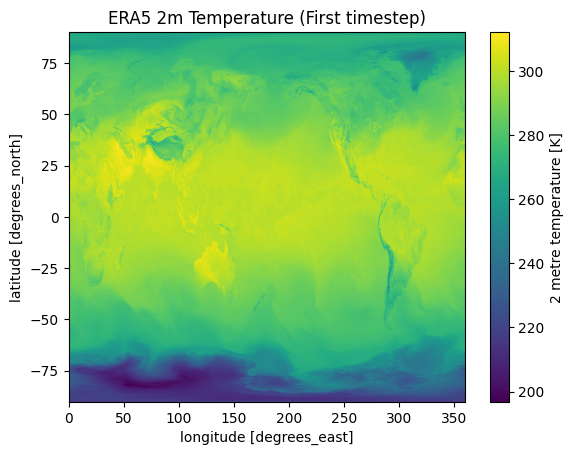

In [14]:

ax = t2m.isel(valid_time=0).plot()
plt.title("ERA5 2m Temperature (First timestep)")
plt.show()


## 7. Plot the time series at Athens

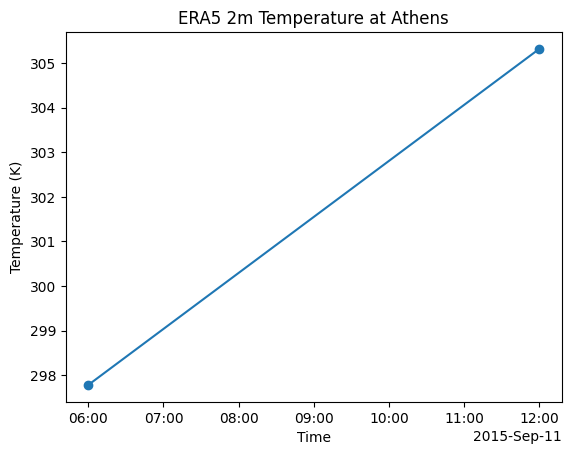

In [15]:

t2m_point.plot(marker="o", linestyle="-")
plt.title("ERA5 2m Temperature at Athens")
plt.ylabel("Temperature (K)")
plt.xlabel("Time")
plt.show()


## 8. Quick stats & anomalies (optional)

Mean Temperature (K): 301.54864501953125
Max  Temperature (K): 305.31610107421875
Min  Temperature (K): 297.7811584472656


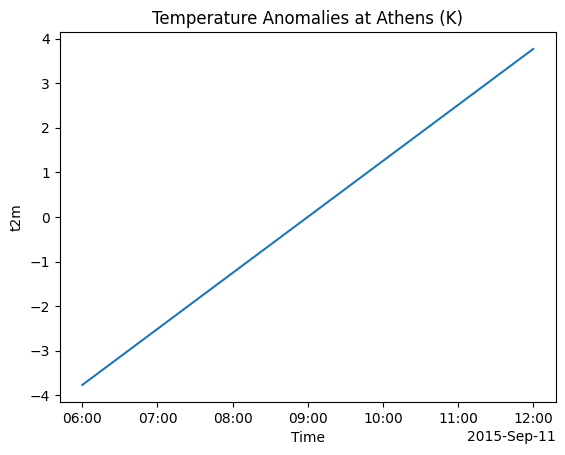

In [16]:

print("Mean Temperature (K):", float(t2m_point.mean()))
print("Max  Temperature (K):", float(t2m_point.max()))
print("Min  Temperature (K):", float(t2m_point.min()))

t2m_anomaly = t2m_point - t2m_point.mean()
t2m_anomaly.plot()
plt.title("Temperature Anomalies at Athens (K)")
plt.xlabel("Time")
plt.show()



---

### ✅ What you accomplished
- Opened a NetCDF file with **xarray**
- Explored variables, dimensions, and attributes
- Examined the **time** dimension
- Extracted a **point time series**
- Plotted a **map** (first timestep) and a **time series**

**Next:** Continue to **Tutorial 02 — Time Series Analysis** for deeper temporal analysis.
